## 第三章 线性模型

 - 3.1 一元线性回归
 - 3.2 多元线性回归
 - 3.3 对数几率回归
 - 3.4 线性判别分析

### 一元线性回归——Advertising广告预测

使用advertising-dataset广告预测数据集：
1.	打乱数据顺序，取前70%的数据作为训练集，后30%的数据作为测试集
2.	分别以TV, Radio, Newspaper三种特征作为模型的输入，Sales作为模型的输出
3.	在训练集上，使用最小二乘法求解模型参数（需自己实现，不允许第三方库完成）
4.	计算三个模型在测试集上的MAE和RMSE这两种指标的大小（需自己实现，不允许第三方库完成）
5.	分别绘制模型的在训练集和测试集上的曲线
6.	选做：尝试去除训练集中的异常值或离群值后再次训练模型，绘制模型的预测曲线，观察模型在测试集上预测能力的变化


In [2]:
#加载包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# 使用pandas读取csv数据
data = pd.read_csv('data/advertising/advertising.csv')
# 打印前5行




#### 针对第三步，自行实现最小二乘法

本实验要求使用最小二乘法求解一元线性回归模型  
求解$w$和$b$使均方误差$E_{(w,b)} = \sum^m_{i=1}(y_i - wx_i - b)^2$最小化的过程，称为线性回归模型的最小二乘“参数估计”(parameter estimation)。我们可将$E_{(w,b)}$分别对$w$和$b$求导，得到
$$\tag{4}
\frac{\partial E_{(w,b)}}{\partial w} = 2(w \sum^m_{i=1} x^2_i - \sum^m_{i=1} (y_i - b) x_i),
$$

$$\tag{5}
\frac{\partial E_{(w,b)}}{\partial b} = 2(mb - \sum^m_{i=1}(y_i - w x_i))
$$

然后令式(4)和式(5)为0，可得到$w$和$b$的闭式解(closed-form solution)
$$\tag{6}
w = \frac{\sum^m_{i=1} y_i(x_i - \bar{x})}{\sum^m_{i=1}x^2_i - \frac{1}{m}(\sum^m_{i=1}x_i)^2}
$$

$$\tag{7}
b = \frac{1}{m}\sum^m_{i=1}(y_i - w x_i)
$$
其中，$\bar{x} = \frac{1}{m}\sum^m_{i=1}x_i$为$x$的均值

In [3]:
def get_w(x:pd.Series, y:pd.Series):
    '''
    这个函数是计算模型w的值的函数，
    传入的参数分别是x和y，表示数据与标记
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记
    
    Returns
    ----------
        w: float, 模型w的值
    '''

    """

    :param x:
    :param y:
    :return:
    w: float, just for x, a scalar
    """
    w =  (y * (x - x.mean())).sum() / ((x*x).sum()- (x.sum()**2)/len(x))
    return pd.Series(w)


In [4]:
def get_b(x: pd.Series, y:pd.Series, w:pd.Series):
    '''
    这个函数是计算模型b的值的函数，
    传入的参数分别是x, y, w，表示数据，标记以及模型的w值
    
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记
        
        w: np.ndarray, pd.Series，模型w的值
    
    Returns
    ----------
        b: float, 模型b的值
    '''

    """

    :param x:
    :param y:
    :param w: when x is a scalar, w's dim = 1
    :return:
    """
    b = (y - x*w).mean()
    return b

In [5]:
class MyLinearRegression:
    def __init__(self):
        '''
        类的初始化方法，不需要初始化的参数
        这里设置了两个成员变量，用来存储模型w和b的值
        '''
        self.w:pd.Series = np.nan
        self.b = np.nan
    
    def fit(self, x, y):
        '''
        这里需要编写训练的函数，也就是调用模型的fit方法，传入特征x的数据和标记y的数据
        这个方法就可以求解出w和b
        '''
        # 请你补充求解w和b过程
        # YOUR CODE HERE
        self.w = get_w(x, y)
        self.b = get_b(x, y, self.w)

        
    def predict(self, x:pd.Series):
        '''
        这是预测的函数，传入特征的数据，返回模型预测的结果
        '''
        if self.w.dtype == np.nan or self.b.dtype == np.nan:
            print("module has not been trained, please call fit func")
            return
        else:
            return x*self.w.values + self.b


#### 针对第四步，自行实现MAE和RMSE

模型训练完成后，还需要在测试集上验证其预测能力，这就需要计算模型的一些性能指标，如MAE和RMSE等。

$$\tag{8}
MAE(\hat{y}, y) = \frac{1}{m} \sum^m_{i=1} \vert \hat{y} - y \vert
$$

$$\tag{9}
RMSE(\hat{y}, y) = \sqrt{\frac{1}{m} \sum^m_{i=1} (\hat{y} - y)^2}
$$
其中，$\hat{y}$是模型的预测值，$y$是真值，$m$是样本数

In [6]:
def MAE(net:MyLinearRegression,x:pd.Series, y:pd.Series):
    """
    this mae loss is for test set. btw, when be called, the net has been trained
    the net is trained by the optimization method of normal equation.
    :param x:
    :param y:
    :return:
    """

    y_hat = net.predict(x)
    mae = np.abs(y - y_hat).mean()
    return mae


In [7]:
def RMSE(net:MyLinearRegression, x:pd.Series, y:pd.Series):
    y_hat = net.predict(x)
    rmse = np.sqrt(((y-y_hat)**2).mean())
    return rmse

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict


def train(net:MyLinearRegression, data:pd.Series, result:list):
    x_train_set = data.iloc[0:int(data.shape[0]*0.7),0:-1]
    y_train_set = data.iloc[0:int(data.shape[0]*0.7),-1]
    x_test_set = data.iloc[int(data.shape[0]*0.7):,0:-1]
    y_test_set = data.iloc[int(data.shape[0] * 0.7):, -1]
    # print(x_train_set)
    # print()
    # print(x_test_set)
    # print()
    # print(y_train_set)
    # print(y_test_set)

    for i in range(x_train_set.shape[1]):
        x = x_train_set.iloc[:, i]
        y = y_train_set
        x_test = x_test_set.iloc[:, i]
        y_test = y_test_set
        net.fit(x, y)
        result.append([net.w, net.b])

        mae = MAE(net, x_test, y_test)
        rmse = RMSE(net, x_test, y_test)
        print("mae loss is ", mae)
        print("rmse loss is", rmse)




In [45]:
data = pd.read_csv(f"./data/advertising/advertising.csv", index_col=False)
# print(data)
net = MyLinearRegression()
result = []
train(net, data, result)

# for i in range(3):
#     print(result[i][0].values)
#     print(type(result[i][1]))

mae loss is  3.0870271915841143
rmse loss is 3.713166141342782
mae loss is  5.331751926620541
rmse loss is 6.798892392001297
mae loss is  6.345040681537671
rmse loss is 7.648155964787649


#### 针对第五步，可视化模型预测效果

In [10]:
#借助绘图工具
import matplotlib.pyplot as plt

In [11]:
# 可参考的函数
# plt.figure(figsize = ())
# plt.plot()
# plt.xlabel()
# plt.ylabel()
# plt.title()
# plt.legend()

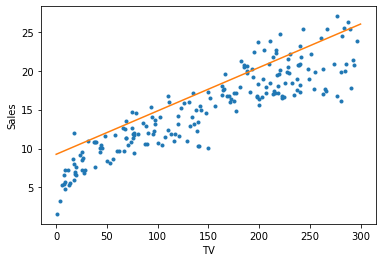

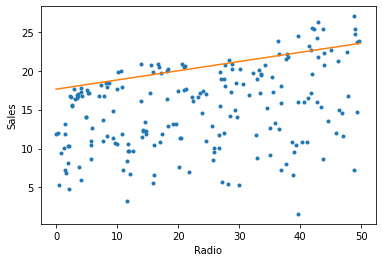

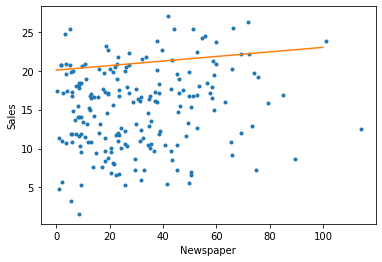

In [46]:
x = np.arange(0, 300, 0.1)
plt.figure()
plt.plot(data['TV'],data['Sales'],'.')
plt.xlabel('TV')
plt.ylabel('Sales')
y = x * result[0][0].values + result[0][1]
plt.plot(x, y)

plt.figure()
plt.plot(data['Radio'], data['Sales'], '.')
plt.xlabel('Radio')
plt.ylabel('Sales')
x = np.arange(0, 50, 0.1)
y = x * result[1][0].values + result[1][1]
plt.plot(x, y)


plt.figure()
plt.plot(data['Newspaper'],data['Sales'],'.')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
x = np.arange(0, 100, 0.1)
y = x * result[2][0].values + result[2][1]
plt.plot(x, y)

#### 针对第六步，去除训练集中的异常值或离群值后再次训练模型

In [99]:
def train_without_bad_data(net:MyLinearRegression, data:pd.Series, result:list):
    #  3 sigmoid principle
    x_train_set = data.iloc[0:int(data.shape[0]*0.7),0:-1]
    y_train_set = data.iloc[0:int(data.shape[0]*0.7),-1]
    x_test_set = data.iloc[int(data.shape[0]*0.7):,0:-1]
    y_test_set = data.iloc[int(data.shape[0] * 0.7):, -1]
    # print(x_train_set)
    # print()
    # print(x_test_set)
    # print()
    # print(y_train_set)
    # print(y_test_set)

    for i in range(x_train_set.shape[1]):
        x = x_train_set.iloc[:, i]
        y = y_train_set
        x_test = x_test_set.iloc[:, i]
        y_test = y_test_set
        net.fit(x, y)
        # result.append([net.w, net.b])
        y_hat = net.predict(x)
        tem = pd.concat([x, y], axis=1)
        residual = np.abs(y_hat - y)
        tem['residual'] = residual
        tem = tem[abs(tem['residual'] - tem['residual'].mean()) < 3* tem['residual'].std()]
        # print(type(tem['residual']))
        # print(tem)
        x = tem.iloc[:,0]
        y = tem.iloc[:,1]
        # print(x)
        # print(y)
        net.fit(x, y)
        result.append([net.w, net.b])


        mae = MAE(net, x_test, y_test)
        rmse = RMSE(net, x_test, y_test)
        print("mae loss is ", mae)
        print("rmse loss is", rmse)


In [100]:
data = pd.read_csv(f"./data/advertising/advertising.csv", index_col=False)
# print(data)
net = MyLinearRegression()
result = []

train(net, data, result)
print()
result_without_bad_data = []
train_without_bad_data(net, data, result_without_bad_data)

mae loss is  3.0870271915841143
rmse loss is 3.713166141342782
mae loss is  5.331751926620541
rmse loss is 6.798892392001297
mae loss is  6.345040681537671
rmse loss is 7.648155964787649

mae loss is  3.0856925406322326
rmse loss is 3.7121438868596592
mae loss is  5.208735743322586
rmse loss is 6.695636151916634
mae loss is  6.345040681537671
rmse loss is 7.648155964787649


说实话，数据去噪声后，就mae和rmse而言几乎没什么区别。仅在千分位表现出一点差异。。。

### 多元线性回归——Advertising广告预测

1.使用多个特征作为输入完成广告预测问题\
2.计算模型在十折交叉验证上MAE和RMSE的值，比较不同的特征组合在模型预测能力上的影响。\
模型可使用sklearn.linear_model.LinearRegression \
3.选做：多项式回归（一元线性回归的扩展），尝试对部分特征进行变换，如将其二次幂，三次幂作为特征输入模型，观察模型在预测能力上的变化。


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict



In [178]:
net = LinearRegression()
data = pd.read_csv(f"./data/advertising/advertising.csv", index_col=False)
data = data.to_numpy()

x_train = data[:, 0:3]
y_train = data[:, 3]
net.fit(x_train, y_train)
print(net.coef_)
print(net.intercept_)

[0.05444578 0.10700123 0.00033566]
4.625124078808652


####  使用sklearn完成一元线性回归的十折交叉验证验证

In [179]:
model = LinearRegression()
data = pd.read_csv(f"./data/advertising/advertising.csv", index_col=False)

prediction = cross_val_predict(model, data[['TV']],data['Sales'], cv = 10)
prediction


array([19.66947213,  9.31653863,  7.79372028, 15.28509404, 16.91947417,
        7.3195827 , 10.04169022, 13.53915213,  7.31400461, 17.97931111,
       10.52140589, 18.81044639,  8.16187417, 12.27292589, 18.21916894,
       17.73387518, 10.6162334 , 22.53103187, 10.69432665, 15.05081429,
       19.27470008, 20.35581132,  7.5986987 , 19.83801593, 10.39251774,
       21.8067764 , 14.97870542, 20.50944291, 21.00447806, 10.86479265,
       23.51379414, 13.27168767, 12.37834839, 21.960408  , 12.2929975 ,
       23.38861284, 22.03437876, 11.09808508,  9.30002639, 19.82094575,
       18.12595519, 16.73184235, 23.10649163, 18.36650799,  8.42730355,
       16.62796728, 11.95905606, 20.17065401, 19.47633115, 10.71255517,
       17.97834324, 12.54403674, 18.88588336, 17.03800047, 21.4171549 ,
       17.92913926,  7.45415812, 14.50126182, 18.57972525, 18.57425814,
        9.99766882, 21.42391857, 20.21420974, 12.70301765, 14.26464178,
       10.84996368,  8.78795999, 14.71553325, 20.10973489, 18.97

####  使用sklearn完成MAE和RMSE

In [187]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('mae is',mean_absolute_error(prediction, y_train))
print('mse is',mean_squared_error(prediction, y_train))

mae is 1.8484560436845014
mse is 5.344842994121723


#### 选择多种特征进行组合，完成多元线性回归，并对比不同的特征组合，它们训练出的模型在十折交叉验证上MAE与RMSE的差别，至少完成3组

In [188]:
def trainAndPredict(features, label, model:LinearRegression, cv = 10):
    # YOUR CODE HERE
    prediction = cross_val_predict(model, features, label)
    mae = mean_absolute_error(label, prediction)
    rmse = mean_squared_error(label, prediction)
    return mae,rmse

In [214]:
data = pd.read_csv(f"./data/advertising/advertising.csv", index_col=False)
data = data.to_numpy()

features = data[:, 0:2]
label = data[:, 3]
print(trainAndPredict(features, label, LinearRegression()))
features = data[:, 1:3]
print(trainAndPredict(features, label, LinearRegression()))
features = data[:, [0, 2]]
print(trainAndPredict(features, label, LinearRegression()))



(1.265904823732983, 2.8452315934180534)
(4.325502564765548, 25.721458679966148)
(1.7690623058342674, 5.041174410802338)


###### 双击此处填写
1. 模型1使用的特征：TV	Radio
2. 模型2使用的特征：Radio newspaper
3. 模型3使用的特征: TV Newspaper

模型  |MAE|RMSE
-|-|-
model1 (1.265904823732983, 2.8452315934180534)
model2 (4.325502564765548, 25.721458679966148)
model3 (1.7690623058342674, 5.041174410802338)

### 对数几率回归——手机市场价分类

使用mobile_price数据集对手机市场价进行分类
1.	此数据集不存在缺失值但存在不合逻辑的值，例如部分样本的手机屏幕宽度sc_w特征为0，要求使用数据集时首先进行清洗以剔除这些错误样本
2.	原数据中手机价格总共有4类，为让其适用于对数几率回归二分类，要求对价格类别进行合并（0：低，1：较低，2：较高，3：高）0和1归为一类，2和3归为一类，使用对数几率回归实现对手机价格的二分类
3.	计算十折交叉验证下的精度，查准率，查全率，F1分数
4.	模型使用sklearn.linear_model.LogisticRegression 同时要求理解其求解方法，分别尝试最大迭代次数100，1000，5000设置，分析不同结果的可能原因


In [4]:
# 读取数据
data = pd.read_csv('data/mobile_phone/train.csv', delimiter=',')
# 查看数据集的特征信息
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
import numpy as np
import pandas as pd

#### 针对1）去除异常值

In [277]:
# 查看sc_w列中值为0的样本数量
print(len(data[(data.sc_w == 0)].index.tolist()))

180


In [5]:
# 删除sc_w值为0所在的所有行
data =  data.drop(data[data['sc_w']==0].index)
# # 查看删除后的数据的信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1820 non-null   int64  
 1   blue           1820 non-null   int64  
 2   clock_speed    1820 non-null   float64
 3   dual_sim       1820 non-null   int64  
 4   fc             1820 non-null   int64  
 5   four_g         1820 non-null   int64  
 6   int_memory     1820 non-null   int64  
 7   m_dep          1820 non-null   float64
 8   mobile_wt      1820 non-null   int64  
 9   n_cores        1820 non-null   int64  
 10  pc             1820 non-null   int64  
 11  px_height      1820 non-null   int64  
 12  px_width       1820 non-null   int64  
 13  ram            1820 non-null   int64  
 14  sc_h           1820 non-null   int64  
 15  sc_w           1820 non-null   int64  
 16  talk_time      1820 non-null   int64  
 17  three_g        1820 non-null   int64  
 18  touch_sc

#### 针对2）转化为2分类

In [6]:
def classification(price):
    if price == 0 or price ==1:
        return 0
    else:
        return 1
data['price_new'] = data['price_range'].apply(classification)
data = data.to_numpy()
print(data)

[[8.420e+02 0.000e+00 2.200e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 0.000e+00 2.000e+00 1.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 0.000e+00 2.000e+00 1.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 0.000e+00 3.000e+00 1.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 0.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 3.000e+00 1.000e+00]]


#### 针对3）计算十折交叉验证下的精度，查准率，查全率，F1分数

使用mobile_price数据集对手机市场价进行分类
1.	此数据集不存在缺失值但存在不合逻辑的值，例如部分样本的手机屏幕宽度sc_w特征为0，要求使用数据集时首先进行清洗以剔除这些错误样本
2.	原数据中手机价格总共有4类，要求对价格类别进行合并（0：低，1：较低，2：较高，3：高）0和1归为一类，2和3归为一类，使用线性判别分析实现对手机价格的二分类
3.	计算十折交叉验证下的精度，查准率，查全率，F1分数
4.	模型使用sklearn.discriminant_analysis.LinearDiscriminantAnalysis 同时要求理解其求解方法
5. 选做：利用 sklearn.processing里的标准化、归一化等方法对特征进行变换，分析变换对预测结果的影响。【同样采用十折交叉验证和相同的指标】

###### 双击此处填写

liblinear
迭代次数|精度|查准率|查全率|F1
-|-|-|-|-
100 |  0.9401098901098901    0.9334763948497854     0.9487459105779716      0.9410492157923203
1000 | 0.9401098901098901    0.9334763948497854     0.9487459105779716      0.9410492157923203
5000 | 0.9401098901098901    0.9334763948497854     0.9487459105779716      0.9410492157923203

sag
迭代次数|精度|查准率|查全率|F1
-|-|-|-|-
100 |   0.865934065934066       0.8430173292558614      0.9018538713195202      0.8714436248682825
1000 |  0.8763736263736264      0.8581780538302277      0.9040348964013086      0.8805098247477429
5000 |  0.8884615384615384      0.872651356993737       0.9116684841875682      0.8917333333333335


关于数值不同的分析：
    其实警告中也提供了一些信息，明显是由于优化方法不同导致不同epoch时，函数收敛程度不同造成的，或者说欠拟合的程度不同。我们选择了两个不同的优化方法sag和liblinear来验证这样的想法。明显liblinear收敛速度更快点，在100轮之前就已经收敛。
    同时，正则化系数也会影响效果数值，也取了C=0.5和1.0两个数进行比较了。但是碍于填表真的太复杂copy太痛苦了，直接保留了1.0的结果。

### 线性判别分析——手机价格分类

In [23]:
# 数据加载及处理同上

In [11]:
from sklearn.linear_model import LogisticRegression #关注函数中的max_iter参数
#评价指标函数
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
#模型训练
# YOUR CODE HERE
epoch_list = [100, 1000, 5000]
def train_logisticregression(epoch_list, data, solver_method):
    for i in epoch_list:
        print("\n")
        print("when max iter is ", i)
        net = LogisticRegression(penalty='l2', C=1.0, solver=solver_method, max_iter=i)
        x_train = data[:, 0:19]
        y_train = data[:,-1]
        # print(y_train)
        net.fit(x_train, y_train)
        print("coef is")

        print(net.coef_)
        print('intercept is')
        print(net.intercept_)
        #模型评估
        # YOUR CODE HERE
        prediction_phone = cross_val_predict(net, x_train, y_train)

        print("acc is",accuracy_score(y_train, prediction_phone))
        print("precision score is",precision_score(y_train, prediction_phone))
        print("recall score is", recall_score(y_train, prediction_phone))
        print("f1 score is", f1_score(y_train, prediction_phone))

print("solver method is sag\n")
train_logisticregression(epoch_list, data, 'sag')
print("solver method is liblinear\n")
train_logisticregression(epoch_list, data, 'liblinear')


solver method is sag



when max iter is  100
coef is
[[ 0.00016426 -0.00045877 -0.00121571 -0.00054385 -0.00273144 -0.00046719
  -0.01854549 -0.00041873 -0.0309914  -0.00308789 -0.00728879  0.00096959
  -0.00094638  0.00279643 -0.01065951 -0.00484754 -0.00966747 -0.00058642
  -0.00061101]]
intercept is
[-0.00086314]


D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\si

acc is 0.865934065934066
precision score is 0.8430173292558614
recall score is 0.9018538713195202
f1 score is 0.8714436248682825


when max iter is  1000


D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


coef is
[[ 0.00058057 -0.00344438 -0.00958596 -0.0046435  -0.01025193 -0.0035905
  -0.0270153  -0.00332423 -0.02878342 -0.0212502  -0.03658994  0.00109759
  -0.0006287   0.00312653 -0.06588692 -0.02417755 -0.05703268 -0.00439464
  -0.00504387]]
intercept is
[-0.00671432]


D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


acc is 0.8763736263736264
precision score is 0.8581780538302277
recall score is 0.9040348964013086
f1 score is 0.8805098247477429


when max iter is  5000
coef is
[[ 0.00087681 -0.01059743 -0.03047314 -0.01540597 -0.00464832 -0.01076295
  -0.02622672 -0.01059587 -0.02798695 -0.05280888 -0.05219357  0.0012239
  -0.00043224  0.00344551 -0.1286247  -0.02409102 -0.0925569  -0.01329126
  -0.01601198]]
intercept is
[-0.02106565]
acc is 0.8884615384615384
precision score is 0.872651356993737
recall score is 0.9116684841875682
f1 score is 0.8917333333333335
solver method is liblinear



when max iter is  100
coef is
[[ 0.0023608  -0.17115816 -0.32904546 -0.42170803 -0.00490987 -0.16108158
  -0.01319638 -0.83510895 -0.01693509 -0.04626684 -0.02751163  0.00167977
   0.00087221  0.00476207 -0.10003874  0.02215184 -0.04818549 -0.16083828
  -0.53605176]]
intercept is
[-8.45359969]
acc is 0.9401098901098901
precision score is 0.9334763948497854
recall score is 0.9487459105779716
f1 score is 0.941049

In [15]:
#模型训练
# YOUR CODE HERE
#模型评估
# YOUR CODE HERE
# train and test combined
epoch_list = [100, 1000, 5000]
def train_discriminant(epoch_list, data, solver_method):
    for i in epoch_list:
        print("\n")
        print("when max iter is ", i)
        net = LinearDiscriminantAnalysis(solver=solver_method)
        # net = LogisticRegression(penalty='l2', C=1.0, solver=solver_method, max_iter=i)
        x_train = data[:, 0:19]
        y_train = data[:,-1]
        # print(y_train)
        net.fit(x_train, y_train)
        print("coef is")

        print(net.coef_)
        print('intercept is')
        print(net.intercept_)
        #模型评估
        # YOUR CODE HERE
        prediction_phone = cross_val_predict(net, x_train, y_train)

        print("acc is",accuracy_score(y_train, prediction_phone))
        print("precision score is",precision_score(y_train, prediction_phone))
        print("recall score is", recall_score(y_train, prediction_phone))
        print("f1 score is", f1_score(y_train, prediction_phone))

print("solver method is svd\n")
train_discriminant(epoch_list, data, 'svd')
# print("solver method is liblinear\n")
# train_logisticregression(epoch_list, data, 'liblinear')



solver method is svd



when max iter is  100
coef is
[[ 0.00247661 -0.07522827  0.04159584 -0.27898454  0.00977888 -0.28477765
  -0.00059856 -0.37855817 -0.00049352  0.10195338 -0.00169042  0.0011974
   0.00121004  0.00537541 -0.00980035  0.00816344 -0.01980988  0.3409289
  -0.22010554]]
intercept is
[-16.5731444]
acc is 0.9648351648351648
precision score is 0.9712707182320443
recall score is 0.9585605234460196
f1 score is 0.9648737650933041


when max iter is  1000
coef is
[[ 0.00247661 -0.07522827  0.04159584 -0.27898454  0.00977888 -0.28477765
  -0.00059856 -0.37855817 -0.00049352  0.10195338 -0.00169042  0.0011974
   0.00121004  0.00537541 -0.00980035  0.00816344 -0.01980988  0.3409289
  -0.22010554]]
intercept is
[-16.5731444]
acc is 0.9648351648351648
precision score is 0.9712707182320443
recall score is 0.9585605234460196
f1 score is 0.9648737650933041


when max iter is  5000
coef is
[[ 0.00247661 -0.07522827  0.04159584 -0.27898454  0.00977888 -0.28477765
  -0.00059856 -0.378

#### 针对选做，填写以下表格

In [17]:
# 不选会扣分吗 doge
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


###### 双击此处填写
1. 模型1的处理流程：
2. 模型2的处理流程：
3. 模型3的处理流程:

模型|数据集|精度|查准率|查全率|F1
-|-|-|-|-|-
模型1 | 数据集 | 0.0 | 0.0 | 0.0 | 0.0
模型2 | 数据集 | 0.0 | 0.0 | 0.0 | 0.0
模型3 | 数据集 | 0.0 | 0.0 | 0.0 | 0.0

### 多分类学习

- 1.分别实现一对一，一对其余，多对多的拆分策略，分类器要求任选上述所学中的一种。
- 2.数据集选择鸢尾花数据集，随机划分20%作为测试集，根据测试集的精度(accuracy)，查准率(precision)，查全率(recall)，F1值分析拆分策略的优劣。（让学生掌握多分类学习任务的策略）
- 3.观察三种方法在实验结果上的差异，分析其原因
- 4.选做：选取前两列特征进行训练，并对训练结果进行可视化

将多分类任务拆为多个二分类任务求解，一般有 3 种拆分策略：
- （1）OvO（一对一，One vs One）：假如数据 D 中有 N 个类别，将 N 个类别进行两两配对，产生 N（N-1）/2 个二分类器，在预测中，将测试样本输入这 N（N-1）/2 个二分类器中得到相应个数的预测结果，然后再将被预测结果数最多的（Voting）作为最终分类结果。
- （2）OvR（一对其余，One vs Rest）: 将一个类别作为正例，其余所有类别作为反例，这样 N 个类别可以产生 N 个二分类器，将测试样本输入这些二分类器中中得到 N 个预测结果，如果仅有一个分类器预测为正类，则将对应的预测结果作为最终预测结果。如果有多个分类器预测为正类，则选择置信度最大的类别作为最终分类结果。
- （3）MvM（多对多，Many vs Many）：将数据集中的若干个类作为正例，若干个其他类作为反例。MvM 的正、反类构造必须有特殊的设计，而不是随意选取，通常采用“纠错输出码（ECOC）”，产生编码矩阵后划分类别。

参考文献：
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [17]:
#加载鸢尾花数据集
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

data_iris = datasets.load_iris()
x, y = data_iris.data, data_iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0, shuffle=True)
# source code may have something wrong. test size = 0.2  follows the question stem, and the source one is 0.3
# print(x)
# print(y)


In [20]:
# 使用multiclass的OvO多分类策略
# YOUR CODE HERE
clf1 = OneVsOneClassifier(LogisticRegression()).fit(x_train, y_train)
result1 = clf1.predict(x_test)
print('the result of OvO')
print('acc is',accuracy_score(y_test, result1))
print('precision is', precision_score(y_test, result1, average='weighted'))
print('recall is', recall_score(y_test, result1, average='weighted'))
print('f1 is', f1_score(y_test, result1, average='weighted'))
# 使用multiclass的OvR多分类策略
# YOUR CODE HERE
clf2 = OneVsRestClassifier(LogisticRegression()).fit(x_train, y_train)
result2 = clf2.predict(x_test)
print('the result of OvR')
print('acc is',accuracy_score(y_test, result2))
print('precision is', precision_score(y_test, result2, average='weighted'))
print('recall is', recall_score(y_test, result2, average='weighted'))
print('f1 is', f1_score(y_test, result2, average='weighted'))
#借助OutputCodeClassifier 实现多对多
# YOUR CODE HERE
clf3 = OutputCodeClassifier(LogisticRegression()).fit(x_train, y_train)
result3 = clf3.predict(x_test)
print('the result of OvR')
print('acc is',accuracy_score(y_test, result3))
print('precision is', precision_score(y_test, result3, average='weighted'))
print('recall is', recall_score(y_test, result3, average='weighted'))
print('f1 is', f1_score(y_test, result3, average='weighted'))

the result of OvO
acc is 1.0
precision is 1.0
recall is 1.0
f1 is 1.0
the result of OvR
acc is 0.9666666666666667
precision is 0.9714285714285714
recall is 0.9666666666666667
f1 is 0.9672820512820512
the result of OvR
acc is 0.5666666666666667
precision is 0.3680555555555555
recall is 0.5666666666666667
f1 is 0.4304761904761905


D:\Anaconda3_2022.05\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 汇总三种方法结果，比较并尝试分析原因

###### 双击此处填写

模型|分类器|精度|查准率|查全率|F1
model: Logistic Regression
-|-|-|-|-|-
OvO |  |  1.0 | 1.0 | 1.0  | 1.0
OvR |  |0.9666666666666667 | 0.9714285714285714 | 0.9666666666666667 | 0.9672820512820512
MvM |  | 0.5666666666666667 | 0.3680555555555555 | 0.5666666666666667 | 0.4304761904761905

结果分析：
对于 OvO效果非常好， 以至于我一开始还以为是什么地方做错了。OVR的效果也非常好。个人对OvR和OvO的理解是，他们的区别可能主要体现在计算性能差异上，效果许多时候差异并不大，只是这个数据集由于OvO直接100%了，所以显得OVR稍差一点。这个数据集也不是很大，本人的电脑配置并不是很好，跑的也很快，性能不是考虑的关键。
至于MvM主要比较依赖ECOC，这个变数很多，现在看来效果不是这么好。


#### 选做：选取前两列特征，任选上述三种方法之一进行重新训练，可视化实验结果

the result of OvR
acc is 0.7333333333333333
precision is 0.7568181818181817
recall is 0.7333333333333333
f1 is 0.7412698412698414


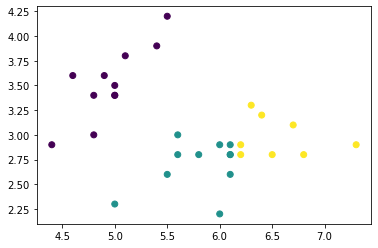

In [127]:
# 可以不选吗 doge
# 尝试画了一下 pcolormesh文档太少了 官方文档连个例子都没有 就用scatter浅画了一下 感觉没有实验课上的例子好看 doge
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
import numpy as np
#参考：借助plt.pcolormesh，plt.scatter，工具

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
data_iris = datasets.load_iris()
x, y = data_iris.data, data_iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0, shuffle=True)
x_train = x_train[:, 0:2]
x_test = x_test[:, 0:2]

# i chose ovo
result4 = OneVsOneClassifier(LogisticRegression()).fit(x_train, y_train).predict(x_test)
print('the result of OvR')
print('acc is',accuracy_score(y_test, result4))
print('precision is', precision_score(y_test, result4, average='weighted'))
print('recall is', recall_score(y_test, result4, average='weighted'))
print('f1 is', f1_score(y_test, result4, average='weighted'))
plt.scatter(x_test[:,0],x_test[:,1], c=result4)
# print(result4.shape)
# Z = np.concatenate((x_test, result4.reshape(30,-1)), axis=1)
# print(Z)
# plt.pcolormesh( Z, cmap=cm_light)
# plt.pcolormesh(x_train[:,0], x_train[:,1],y_train, cmap=cm_light)

